<a href="https://colab.research.google.com/github/shatakshii25/Machine-Learning-Projects/blob/main/SingleLayerPerceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import sklearn

In [2]:
import pandas as pd
import numpy as np

In [3]:
import seaborn 

In [4]:
import tensorflow.compat.v1 as tf 

In [5]:
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [6]:
import matplotlib.pyplot as plt

In [7]:
from sklearn.utils import shuffle
from sklearn import model_selection
from sklearn.metrics import classification_report

In [8]:
from sklearn.metrics import accuracy_score

In [9]:
from sklearn.metrics import confusion_matrix 

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [12]:
import warnings
warnings.filterwarnings('ignore')

In [13]:
data = pd.read_csv('/content/sonar.all-data.csv')

In [14]:
data.head()

,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
0,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
1,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
2,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
3,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
4,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,...,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062,R


In [15]:
data.describe()

,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032
count,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,...,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000
mean,0.029208,0.038443,0.043837,0.054053,0.075105,0.104599,0.121591,0.134677,0.177361,0.208245,...,0.016034,0.013472,0.010729,0.010917,0.009300,0.008181,0.007771,0.007947,0.007936,0.006523
std,0.023038,0.033040,0.038521,0.046583,0.055669,0.059247,0.061897,0.085340,0.118311,0.134741,...,0.012027,0.009628,0.007071,0.007310,0.007103,0.005719,0.005756,0.006485,0.006196,0.005038
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013300,0.016400,0.018900,0.024450,0.037700,0.066950,0.080600,0.080350,0.096750,0.111150,...,0.008350,0.007350,0.005050,0.005350,0.004100,0.004400,0.003700,0.003600,0.003650,0.003100
50%,0.022800,0.030800,0.034200,0.044100,0.062000,0.092100,0.105600,0.111900,0.152200,0.181000,...,0.013800,0.011500,0.009600,0.009300,0.007500,0.006800,0.005900,0.005800,0.006300,0.005300
75%,0.035800,0.048100,0.058200,0.065700,0.101050,0.134150,0.153050,0.169800,0.231500,0.269000,...,0.020700,0.016750,0.014900,0.014450,0.012100,0.010350,0.010350,0.010400,0.010350,0.008550
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 61 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0.0200  207 non-null    float64
 1   0.0371  207 non-null    float64
 2   0.0428  207 non-null    float64
 3   0.0207  207 non-null    float64
 4   0.0954  207 non-null    float64
 5   0.0986  207 non-null    float64
 6   0.1539  207 non-null    float64
 7   0.1601  207 non-null    float64
 8   0.3109  207 non-null    float64
 9   0.2111  207 non-null    float64
 10  0.1609  207 non-null    float64
 11  0.1582  207 non-null    float64
 12  0.2238  207 non-null    float64
 13  0.0645  207 non-null    float64
 14  0.0660  207 non-null    float64
 15  0.2273  207 non-null    float64
 16  0.3100  207 non-null    float64
 17  0.2999  207 non-null    float64
 18  0.5078  207 non-null    float64
 19  0.4797  207 non-null    float64
 20  0.5783  207 non-null    float64
 21  0.5071  207 non-null    float64
 22  0.

In [17]:
x = data.drop(columns="R", axis=1)
x

,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032
0,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044
1,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0033,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078
2,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0241,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117
3,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0156,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094
4,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,...,0.0104,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0203,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157
203,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0051,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067
204,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0155,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031
205,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0042,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048


In [18]:
y = data["R"]
y

0      R
1      R
2      R
3      R
4      R
      ..
202    M
203    M
204    M
205    M
206    M
Name: R, Length: 207, dtype: object

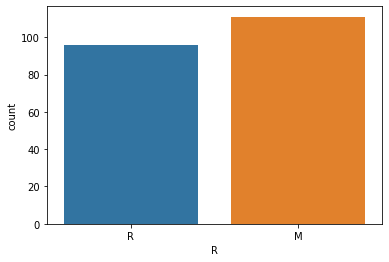

In [19]:
seaborn.countplot(x="R", data=data)

In [20]:
binary_type = pd.get_dummies(data["R"], drop_first=True)
binary_type.head()

,R
0,1
1,1
2,1
3,1
4,1


In [21]:
x = data[data.columns[0:60]].values
y = data["R"]

In [22]:
def one_hot_encode(labels):
  n_labels = len(labels)
  n_unique_labels = len(np.unique(labels))
  one_hot_encode = np.zeros((n_labels, n_unique_labels))
  one_hot_encode[np.arange(n_labels), labels] = 1
  return one_hot_encode

In [23]:
encoder = LabelEncoder()
encoder.fit(y)
y = encoder.transform(y)
Y = one_hot_encode(y)

In [24]:
X, Y = shuffle(x,Y, random_state = 1)

In [25]:
train_x, test_x, train_y, test_y = train_test_split(X,Y, test_size = 0.2, random_state=42)

In [26]:
learning_rate = 0.1
training_epochs = 1000

In [27]:
cost_history = np.empty(shape=[1], dtype=float)

In [28]:
n_dim = X.shape[1]
n_class = 2

In [29]:
x = tf.placeholder(tf.float32, [None, n_dim])
W = tf.Variable(tf.zeros([n_dim, n_class]))
b = tf.Variable(tf.zeros([n_class]))

In [30]:
init = tf.global_variables_initializer()

In [31]:
y_ = tf.placeholder(tf.float32, [None, n_class])
y = tf.nn.softmax(tf.matmul(x,W)+b)
cost_function = tf.reduce_mean(-tf.reduce_sum((y_ * tf.log(y)), reduction_indices=[1]))
training_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost_function)

In [32]:
sess = tf.Session()

In [33]:
sess.run(init)
mse_history = []

In [34]:
for epoch in range(training_epochs):
  sess.run(training_step, feed_dict={x: train_x, y_: train_y})
  cost = sess.run(cost_function, feed_dict={x: train_x, y_: train_y})
  cost_history = np.append(cost_history, cost)
  print('epoch: ', epoch, ' - ','cost: ', cost)

epoch:  0  -  cost:  0.68905866
epoch:  1  -  cost:  0.68616134
epoch:  2  -  cost:  0.68367136
epoch:  3  -  cost:  0.6813467
epoch:  4  -  cost:  0.6791113
epoch:  5  -  cost:  0.6769402
epoch:  6  -  cost:  0.6748241
epoch:  7  -  cost:  0.6727587
epoch:  8  -  cost:  0.6707412
epoch:  9  -  cost:  0.66876936
epoch:  10  -  cost:  0.6668413
epoch:  11  -  cost:  0.66495526
epoch:  12  -  cost:  0.6631094
epoch:  13  -  cost:  0.6613022
epoch:  14  -  cost:  0.65953195
epoch:  15  -  cost:  0.65779734
epoch:  16  -  cost:  0.6560969
epoch:  17  -  cost:  0.6544292
epoch:  18  -  cost:  0.6527932
epoch:  19  -  cost:  0.65118754
epoch:  20  -  cost:  0.6496111
epoch:  21  -  cost:  0.64806294
epoch:  22  -  cost:  0.6465418
epoch:  23  -  cost:  0.6450467
epoch:  24  -  cost:  0.64357686
epoch:  25  -  cost:  0.6421313
epoch:  26  -  cost:  0.6407093
epoch:  27  -  cost:  0.63930976
epoch:  28  -  cost:  0.63793224
epoch:  29  -  cost:  0.6365758
epoch:  30  -  cost:  0.63523984
epoch

In [35]:
pred_y = sess.run(y, feed_dict={x: test_x})

&amp;amp;quot;Accuracy: &amp;amp;quot 0.8333333


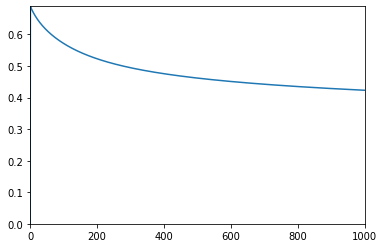

In [36]:
correct_prediction = tf.equal(tf.argmax(pred_y,1), tf.argmax(test_y,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print("&amp;amp;quot;Accuracy: &amp;amp;quot", sess.run(accuracy))

plt.plot(range(len(cost_history)), cost_history)
plt.axis([0, training_epochs,0,np.max(cost_history)])
plt.show()